In [1]:
!pip install requests


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests

# Function to get weather data
def get_weather_data(api_key, city):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    response = requests.get(url)
    return response.json()

# Example usage
api_key = "5b6dfb7e86ed23999eb5d401ab2fb7a9"  # Replace with your OpenWeatherMap API key
city = "Bangalore"  # Replace with your city name
weather_data = get_weather_data(api_key, city)
print(weather_data)


{'coord': {'lon': 77.6033, 'lat': 12.9762}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 293.78, 'feels_like': 294.04, 'temp_min': 292.05, 'temp_max': 294.44, 'pressure': 1012, 'humidity': 82, 'sea_level': 1012, 'grnd_level': 911}, 'visibility': 4000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1730839486, 'sys': {'type': 1, 'id': 9205, 'country': 'IN', 'sunrise': 1730853892, 'sunset': 1730895695}, 'timezone': 19800, 'id': 1277333, 'name': 'Bengaluru', 'cod': 200}


In [2]:
# Cell 1: Fetch Environmental Data (Temperature, Humidity, Rainfall)
import requests

# Function to get weather data from OpenWeatherMap API
def get_weather_data(city_name, api_key):
    # Endpoint for weather data (current weather)
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}&units=metric"
    
    response = requests.get(url)
    data = response.json()
    
    if data["cod"] == 200:
        # Extract relevant data
        temperature = data["main"]["temp"]  # Temperature in Celsius
        humidity = data["main"]["humidity"]  # Humidity in percentage
        rainfall = data.get("rain", {}).get("1h", 0)  # Rainfall in last 1 hour (mm)
        return temperature, humidity, rainfall
    else:
        print(f"Error fetching data: {data['message']}")
        return None, None, None


city_name = "Bangalore"  
api_key = "5b6dfb7e86ed23999eb5d401ab2fb7a9"  
temperature, humidity, rainfall = get_weather_data(city_name, api_key)

print(f"Temperature: {temperature}°C, Humidity: {humidity}%, Rainfall in last hour: {rainfall} mm")


Temperature: 22.44°C, Humidity: 87%, Rainfall in last hour: 0 mm


In [4]:
import requests
import numpy as np
import cv2  # For image processing

# Function to get weather data from OpenWeatherMap API
def get_weather_data(city_name, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}&units=metric"
    
    response = requests.get(url)
    data = response.json()
    
    if data["cod"] == 200:
        temperature = data["main"]["temp"]  # Temperature in Celsius
        humidity = data["main"]["humidity"]  # Humidity in percentage
        rainfall = data.get("rain", {}).get("1h", 0)  # Rainfall in last 1 hour (mm)
        return temperature, humidity, rainfall
    else:
        print(f"Error fetching data: {data['message']}")
        return None, None, None


In [5]:
# Cell 2: Integrate Environmental Data into Disease Prediction
def enhance_disease_prediction(model, image, temperature, humidity, rainfall):
    # Preprocess the image (resize, normalize, etc.) for prediction
    image_resized = cv2.resize(image, (256, 256))  # Resize to match the image input size (256x256)
    image_array = np.expand_dims(image_resized, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize pixel values to [0, 1]
    
    # Get the disease prediction from the model
    prediction = model.predict(image_array)
    predicted_class_idx = np.argmax(prediction)
    
    # Get the predicted disease (using a dictionary of disease class names)
    disease_class_names = {
        0: 'Tomato Leaf Mold', 1: 'Tomato Septoria Spot', 2: 'Potato Early Blight',
        3: 'Tomato Early Blight', 4: 'Tomato Late Blight', 5: 'Potato Late Blight',
        # Add other classes as needed
    }
    predicted_disease = disease_class_names.get(predicted_class_idx, "Unknown Disease")
    
    # Factor in environmental conditions to enhance prediction
    if temperature > 30 and humidity > 80:
        # High temperature and humidity can increase the risk of certain diseases
        predicted_disease += " (Risk increased due to high temp and humidity)"
    
    if rainfall > 5:
        # Heavy rainfall can increase the risk of waterborne diseases
        predicted_disease += " (Increased risk due to heavy rainfall)"
    
    return predicted_disease


In [8]:
import tensorflow as tf

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 30

# Load the PlantVillage dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(6, activation='softmax')  # Assuming 6 classes for the PlantVillage dataset
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(dataset, epochs=EPOCHS)


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.5896 - loss: 67.2260
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8145 - loss: 0.5046
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8276 - loss: 0.5262
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9024 - loss: 0.3530
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9429 - loss: 0.1964
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9728 - loss: 0.0736
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9763 - loss: 0.0880
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9792 - loss: 0.0939
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9909 - loss: 0.0415
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9866 - loss: 0.0498
Epoch 11/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9907 - loss: 0.0304
Epoch 12/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9970 -

In [13]:
# Use the model to make a prediction
predicted_disease_with_weather = enhance_disease_prediction(model, sample_image, temperature, humidity, rainfall)
print(f"Predicted Disease: {predicted_disease_with_weather}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
Predicted Disease: Tomato Septoria Spot


In [14]:
# Analyze the results based on weather and predicted disease
print("===== Plant Disease Prediction and Environmental Analysis =====\n")

# Display the base prediction
print(f"Predicted Disease: {predicted_disease_with_weather}\n")

# Further interpretation based on weather conditions
print("=== Environmental Analysis ===")
print(f"Current Temperature: {temperature}°C")
print(f"Current Humidity: {humidity}%")
print(f"Rainfall in Last Hour: {rainfall}mm\n")

# How weather conditions influence plant diseases
print("=== Risk Assessment ===")
if temperature > 30:
    print("- High temperature may stress the plant and worsen certain diseases.")
if humidity > 80:
    print("- High humidity creates a favorable environment for fungal and bacterial growth.")
if rainfall > 5:
    print("- Heavy rainfall may spread diseases and cause waterlogging issues.\n")

# Conclusion based on environmental factors
if temperature > 30 and humidity > 80:
    print("Warning: High temperature and humidity increase the risk of disease spread.")
if rainfall > 5:
    print("Caution: Heavy rainfall may increase disease transmission.")


===== Plant Disease Prediction and Environmental Analysis =====

Predicted Disease: Tomato Septoria Spot

=== Environmental Analysis ===
Current Temperature: 19.74°C
Current Humidity: 81%
Rainfall in Last Hour: 0mm

=== Risk Assessment ===
- High humidity creates a favorable environment for fungal and bacterial growth.


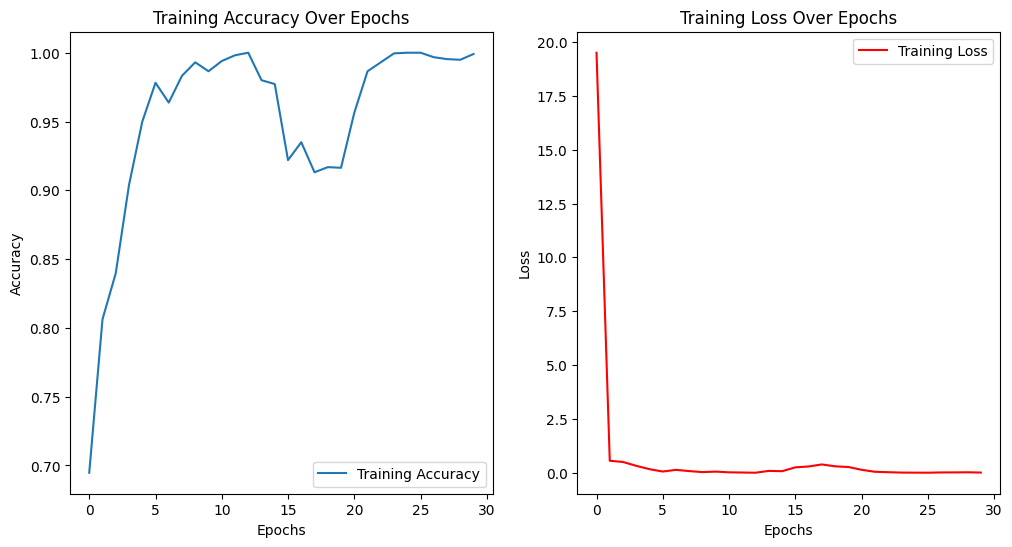

In [15]:
import matplotlib.pyplot as plt

# Plotting the training accuracy and loss
def plot_training_history(history):
    # Extract accuracy and loss from the training history
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    epochs_range = range(EPOCHS)

    # Create two subplots for accuracy and loss
    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy Over Epochs')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()

    plt.show()


plot_training_history(history)
